<a href="https://colab.research.google.com/github/mounsifelatouch/code/blob/master/python/CDD/PFE/CDD_ML_Part_2_Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Bioinformatics Project - Computational Drug Discovery [Part 2] Exploratory Data Analysis**

Mounsif EL ATOUCH


In this Jupyter notebook, we will be building a machine learning model using the ChEMBL bioactivity data.

In **Part 2**, we will be performing Descriptor Calculation and Exploratory Data Analysis.

---

## **Install conda and rdkit**

In [26]:
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
! conda install -c rdkit rdkit -y
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2023-05-02 13:33:38--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’

Miniconda3-py37_4.8 100%[===================>]  81.12M   159MB/s    in 0.5s    

2023-05-02 13:33:39 (159 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: / - \ | / - \ | / - \ | / - \ | / done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.3.0=py37_0
    - ca-certificates==2020.1.1=0
    - certifi==2019.11.28=py37_0
    - cffi==1.14.0=py37h2e261b9_0
    - charde

## **Load bioactivity data**

In [36]:
!wget https://raw.githubusercontent.com/mounsifelatouch/data/master/bioactivity_data_curated.csv

--2023-05-02 13:38:40--  https://raw.githubusercontent.com/mounsifelatouch/data/master/bioactivity_data_curated.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15665 (15K) [text/plain]
Saving to: ‘bioactivity_data_curated.csv’

bioactivity_data_cu 100%[===================>]  15.30K  --.-KB/s    in 0s      

2023-05-02 13:38:40 (30.1 MB/s) - ‘bioactivity_data_curated.csv’ saved [15665/15665]



In [37]:
import pandas as pd

In [38]:
df = pd.read_csv('bioactivity_data_curated.csv')
df

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL243822,Oc1ccc(CCc2ccc(O)c(O)c2O)cc1,30000.0,inactive
1,CHEMBL734,CC(=O)NO,17000.0,inactive
2,CHEMBL242739,O=c1c(-c2ccc(O)cc2)coc2c(O)c(O)ccc12,140000.0,inactive
3,CHEMBL503157,N=C(Cc1ccc(O)cc1)c1ccc(O)c(O)c1,17000.0,inactive
4,CHEMBL412199,NC(Cc1ccc(O)cc1)c1ccc(O)c(O)c1O,47000.0,inactive
...,...,...,...,...
249,CHEMBL4539240,CCC(CO)NC(=O)c1ccccc1[Se][Se]c1ccccc1C(=O)NC(C...,108000.0,inactive
250,CHEMBL4461450,O=C(O)CCCNC(=O)c1ccccc1[Se][Se]c1ccccc1C(=O)NC...,35400.0,inactive
251,CHEMBL4471428,COC(=O)CNC(=O)c1ccccc1[Se][Se]c1ccccc1C(=O)NCC...,85000.0,inactive
252,CHEMBL4575318,COC(=O)CCCNC(=O)c1ccccc1[Se][Se]c1ccccc1C(=O)N...,20100.0,inactive


In [39]:
df_no_smiles = df.drop(columns='canonical_smiles')

In [40]:
smiles = []

for i in df.canonical_smiles.tolist():
  cpd = str(i).split('.')
  cpd_longest = max(cpd, key = len)
  smiles.append(cpd_longest)

smiles = pd.Series(smiles, name = 'canonical_smiles')

In [41]:
df_clean_smiles = pd.concat([df_no_smiles,smiles], axis=1)
df_clean_smiles

,molecule_chembl_id,standard_value,class,canonical_smiles
0,CHEMBL243822,30000.0,inactive,Oc1ccc(CCc2ccc(O)c(O)c2O)cc1
1,CHEMBL734,17000.0,inactive,CC(=O)NO
2,CHEMBL242739,140000.0,inactive,O=c1c(-c2ccc(O)cc2)coc2c(O)c(O)ccc12
3,CHEMBL503157,17000.0,inactive,N=C(Cc1ccc(O)cc1)c1ccc(O)c(O)c1
4,CHEMBL412199,47000.0,inactive,NC(Cc1ccc(O)cc1)c1ccc(O)c(O)c1O
...,...,...,...,...
249,CHEMBL4539240,108000.0,inactive,CCC(CO)NC(=O)c1ccccc1[Se][Se]c1ccccc1C(=O)NC(C...
250,CHEMBL4461450,35400.0,inactive,O=C(O)CCCNC(=O)c1ccccc1[Se][Se]c1ccccc1C(=O)NC...
251,CHEMBL4471428,85000.0,inactive,COC(=O)CNC(=O)c1ccccc1[Se][Se]c1ccccc1C(=O)NCC...
252,CHEMBL4575318,20100.0,inactive,COC(=O)CCCNC(=O)c1ccccc1[Se][Se]c1ccccc1C(=O)N...


## **Calculate Lipinski descriptors**
Christopher Lipinski, a scientist at Pfizer, came up with a set of rule-of-thumb for evaluating the **druglikeness** of compounds. Such druglikeness is based on the Absorption, Distribution, Metabolism and Excretion (ADME) that is also known as the pharmacokinetic profile. Lipinski analyzed all orally active FDA-approved drugs in the formulation of what is to be known as the **Rule-of-Five** or **Lipinski's Rule**.

The Lipinski's Rule stated the following:
* Molecular weight < 500 Dalton
* Octanol-water partition coefficient (LogP) < 5
* Hydrogen bond donors < 5
* Hydrogen bond acceptors < 10 

### **Import libraries**

In [44]:
!pip install rdkit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 29.2 MB 63.1 MB/s 


In [45]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

### **Calculate descriptors**

In [46]:
def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem) 
        moldata.append(mol)
       
    baseData= np.arange(1,1)
    i=0  
    for mol in moldata:        
       
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
           
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
    return descriptors

In [47]:
df_lipinski = lipinski(df_clean_smiles.canonical_smiles)
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,246.262,2.29420,4.0,4.0
1,75.067,-0.48830,2.0,2.0
2,270.240,2.57680,3.0,5.0
3,243.262,2.41397,4.0,4.0
4,261.277,1.75150,5.0,5.0
...,...,...,...,...
249,542.396,-0.03780,4.0,4.0
250,570.362,0.15000,4.0,4.0
251,542.308,-1.23360,2.0,6.0
252,598.416,0.32680,2.0,6.0


### **Combine DataFrames**

Let's take a look at the 2 DataFrames that will be combined.

In [48]:
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,246.262,2.29420,4.0,4.0
1,75.067,-0.48830,2.0,2.0
2,270.240,2.57680,3.0,5.0
3,243.262,2.41397,4.0,4.0
4,261.277,1.75150,5.0,5.0
...,...,...,...,...
249,542.396,-0.03780,4.0,4.0
250,570.362,0.15000,4.0,4.0
251,542.308,-1.23360,2.0,6.0
252,598.416,0.32680,2.0,6.0


In [49]:
df

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL243822,Oc1ccc(CCc2ccc(O)c(O)c2O)cc1,30000.0,inactive
1,CHEMBL734,CC(=O)NO,17000.0,inactive
2,CHEMBL242739,O=c1c(-c2ccc(O)cc2)coc2c(O)c(O)ccc12,140000.0,inactive
3,CHEMBL503157,N=C(Cc1ccc(O)cc1)c1ccc(O)c(O)c1,17000.0,inactive
4,CHEMBL412199,NC(Cc1ccc(O)cc1)c1ccc(O)c(O)c1O,47000.0,inactive
...,...,...,...,...
249,CHEMBL4539240,CCC(CO)NC(=O)c1ccccc1[Se][Se]c1ccccc1C(=O)NC(C...,108000.0,inactive
250,CHEMBL4461450,O=C(O)CCCNC(=O)c1ccccc1[Se][Se]c1ccccc1C(=O)NC...,35400.0,inactive
251,CHEMBL4471428,COC(=O)CNC(=O)c1ccccc1[Se][Se]c1ccccc1C(=O)NCC...,85000.0,inactive
252,CHEMBL4575318,COC(=O)CCCNC(=O)c1ccccc1[Se][Se]c1ccccc1C(=O)N...,20100.0,inactive


Now, let's combine the 2 DataFrame

In [50]:
df_combined = pd.concat([df,df_lipinski], axis=1)

In [51]:
df_combined

,molecule_chembl_id,canonical_smiles,standard_value,class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL243822,Oc1ccc(CCc2ccc(O)c(O)c2O)cc1,30000.0,inactive,246.262,2.29420,4.0,4.0
1,CHEMBL734,CC(=O)NO,17000.0,inactive,75.067,-0.48830,2.0,2.0
2,CHEMBL242739,O=c1c(-c2ccc(O)cc2)coc2c(O)c(O)ccc12,140000.0,inactive,270.240,2.57680,3.0,5.0
3,CHEMBL503157,N=C(Cc1ccc(O)cc1)c1ccc(O)c(O)c1,17000.0,inactive,243.262,2.41397,4.0,4.0
4,CHEMBL412199,NC(Cc1ccc(O)cc1)c1ccc(O)c(O)c1O,47000.0,inactive,261.277,1.75150,5.0,5.0
...,...,...,...,...,...,...,...,...
249,CHEMBL4539240,CCC(CO)NC(=O)c1ccccc1[Se][Se]c1ccccc1C(=O)NC(C...,108000.0,inactive,542.396,-0.03780,4.0,4.0
250,CHEMBL4461450,O=C(O)CCCNC(=O)c1ccccc1[Se][Se]c1ccccc1C(=O)NC...,35400.0,inactive,570.362,0.15000,4.0,4.0
251,CHEMBL4471428,COC(=O)CNC(=O)c1ccccc1[Se][Se]c1ccccc1C(=O)NCC...,85000.0,inactive,542.308,-1.23360,2.0,6.0
252,CHEMBL4575318,COC(=O)CCCNC(=O)c1ccccc1[Se][Se]c1ccccc1C(=O)N...,20100.0,inactive,598.416,0.32680,2.0,6.0


### **Convert IC50 to pIC50**
To allow **IC50** data to be more uniformly distributed, we will convert **IC50** to the negative logarithmic scale which is essentially **-log10(IC50)**.

This custom function pIC50() will accept a DataFrame as input and will:
* Take the IC50 values from the ``standard_value`` column and converts it from nM to M by multiplying the value by 10$^{-9}$
* Take the molar value and apply -log10
* Delete the ``standard_value`` column and create a new ``pIC50`` column

In [52]:
import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', 1)
        
    return x

Point to note: Values greater than 100,000,000 will be fixed at 100,000,000 otherwise the negative logarithmic value will become negative.

In [53]:
df_combined.standard_value.describe()

count    2.540000e+02
mean     2.307708e+05
std      6.856501e+05
min      1.300000e+01
25%      1.100000e+04
50%      4.905000e+04
75%      1.079250e+05
max      4.853000e+06
Name: standard_value, dtype: float64

In [54]:
-np.log10( (10**-9)* 100000000 )

1.0

In [55]:
-np.log10( (10**-9)* 10000000000 )

-1.0

In [56]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', 1)
        
    return x

We will first apply the norm_value() function so that the values in the standard_value column is normalized.

In [57]:
df_norm = norm_value(df_combined)
df_norm

<ipython-input-56-5b44499df3ba>:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = input.drop('standard_value', 1)


,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL243822,Oc1ccc(CCc2ccc(O)c(O)c2O)cc1,inactive,246.262,2.29420,4.0,4.0,30000.0
1,CHEMBL734,CC(=O)NO,inactive,75.067,-0.48830,2.0,2.0,17000.0
2,CHEMBL242739,O=c1c(-c2ccc(O)cc2)coc2c(O)c(O)ccc12,inactive,270.240,2.57680,3.0,5.0,140000.0
3,CHEMBL503157,N=C(Cc1ccc(O)cc1)c1ccc(O)c(O)c1,inactive,243.262,2.41397,4.0,4.0,17000.0
4,CHEMBL412199,NC(Cc1ccc(O)cc1)c1ccc(O)c(O)c1O,inactive,261.277,1.75150,5.0,5.0,47000.0
...,...,...,...,...,...,...,...,...
249,CHEMBL4539240,CCC(CO)NC(=O)c1ccccc1[Se][Se]c1ccccc1C(=O)NC(C...,inactive,542.396,-0.03780,4.0,4.0,108000.0
250,CHEMBL4461450,O=C(O)CCCNC(=O)c1ccccc1[Se][Se]c1ccccc1C(=O)NC...,inactive,570.362,0.15000,4.0,4.0,35400.0
251,CHEMBL4471428,COC(=O)CNC(=O)c1ccccc1[Se][Se]c1ccccc1C(=O)NCC...,inactive,542.308,-1.23360,2.0,6.0,85000.0
252,CHEMBL4575318,COC(=O)CCCNC(=O)c1ccccc1[Se][Se]c1ccccc1C(=O)N...,inactive,598.416,0.32680,2.0,6.0,20100.0


In [58]:
df_norm.standard_value_norm.describe()

count    2.540000e+02
mean     2.307708e+05
std      6.856501e+05
min      1.300000e+01
25%      1.100000e+04
50%      4.905000e+04
75%      1.079250e+05
max      4.853000e+06
Name: standard_value_norm, dtype: float64

In [59]:
df_final = pIC50(df_norm)
df_final

<ipython-input-52-715877a2f74e>:11: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = input.drop('standard_value_norm', 1)


,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL243822,Oc1ccc(CCc2ccc(O)c(O)c2O)cc1,inactive,246.262,2.29420,4.0,4.0,4.522879
1,CHEMBL734,CC(=O)NO,inactive,75.067,-0.48830,2.0,2.0,4.769551
2,CHEMBL242739,O=c1c(-c2ccc(O)cc2)coc2c(O)c(O)ccc12,inactive,270.240,2.57680,3.0,5.0,3.853872
3,CHEMBL503157,N=C(Cc1ccc(O)cc1)c1ccc(O)c(O)c1,inactive,243.262,2.41397,4.0,4.0,4.769551
4,CHEMBL412199,NC(Cc1ccc(O)cc1)c1ccc(O)c(O)c1O,inactive,261.277,1.75150,5.0,5.0,4.327902
...,...,...,...,...,...,...,...,...
249,CHEMBL4539240,CCC(CO)NC(=O)c1ccccc1[Se][Se]c1ccccc1C(=O)NC(C...,inactive,542.396,-0.03780,4.0,4.0,3.966576
250,CHEMBL4461450,O=C(O)CCCNC(=O)c1ccccc1[Se][Se]c1ccccc1C(=O)NC...,inactive,570.362,0.15000,4.0,4.0,4.450997
251,CHEMBL4471428,COC(=O)CNC(=O)c1ccccc1[Se][Se]c1ccccc1C(=O)NCC...,inactive,542.308,-1.23360,2.0,6.0,4.070581
252,CHEMBL4575318,COC(=O)CCCNC(=O)c1ccccc1[Se][Se]c1ccccc1C(=O)N...,inactive,598.416,0.32680,2.0,6.0,4.696804


In [60]:
df_final.pIC50.describe()

count    254.000000
mean       4.416330
std        0.868562
min        2.313990
25%        3.966878
50%        4.309379
75%        4.958607
max        7.886057
Name: pIC50, dtype: float64

Let's write this to CSV file.

In [63]:
df_final.to_csv('bioactivity_data_3class_pIC50.csv')

### **Removing the 'intermediate' bioactivity class**
Here, we will be removing the ``intermediate`` class from our data set.

In [62]:
df_2class = df_final[df_final['class'] != 'intermediate']
df_2class

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL243822,Oc1ccc(CCc2ccc(O)c(O)c2O)cc1,inactive,246.262,2.29420,4.0,4.0,4.522879
1,CHEMBL734,CC(=O)NO,inactive,75.067,-0.48830,2.0,2.0,4.769551
2,CHEMBL242739,O=c1c(-c2ccc(O)cc2)coc2c(O)c(O)ccc12,inactive,270.240,2.57680,3.0,5.0,3.853872
3,CHEMBL503157,N=C(Cc1ccc(O)cc1)c1ccc(O)c(O)c1,inactive,243.262,2.41397,4.0,4.0,4.769551
4,CHEMBL412199,NC(Cc1ccc(O)cc1)c1ccc(O)c(O)c1O,inactive,261.277,1.75150,5.0,5.0,4.327902
...,...,...,...,...,...,...,...,...
249,CHEMBL4539240,CCC(CO)NC(=O)c1ccccc1[Se][Se]c1ccccc1C(=O)NC(C...,inactive,542.396,-0.03780,4.0,4.0,3.966576
250,CHEMBL4461450,O=C(O)CCCNC(=O)c1ccccc1[Se][Se]c1ccccc1C(=O)NC...,inactive,570.362,0.15000,4.0,4.0,4.450997
251,CHEMBL4471428,COC(=O)CNC(=O)c1ccccc1[Se][Se]c1ccccc1C(=O)NCC...,inactive,542.308,-1.23360,2.0,6.0,4.070581
252,CHEMBL4575318,COC(=O)CCCNC(=O)c1ccccc1[Se][Se]c1ccccc1C(=O)N...,inactive,598.416,0.32680,2.0,6.0,4.696804


Let's write this to CSV file.

In [64]:
df_2class.to_csv('bioactivity_data_2class_pIC50.csv')

---

## **Exploratory Data Analysis (Chemical Space Analysis) via Lipinski descriptors**

### **Import library**

In [65]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

### **Frequency plot of the 2 bioactivity classes**

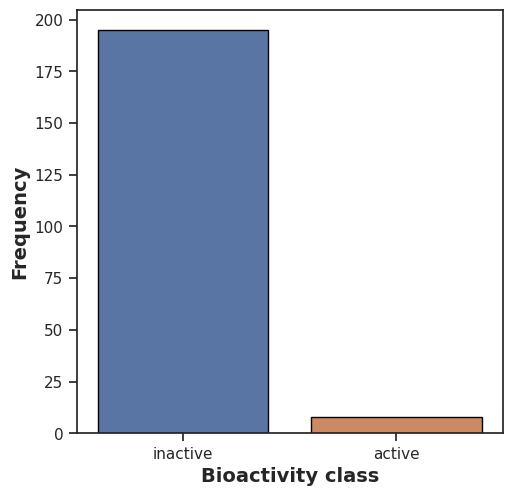

In [66]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='class', data=df_2class, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')

### **Scatter plot of MW versus LogP**

It can be seen that the 2 bioactivity classes are spanning similar chemical spaces as evident by the scatter plot of MW vs LogP.

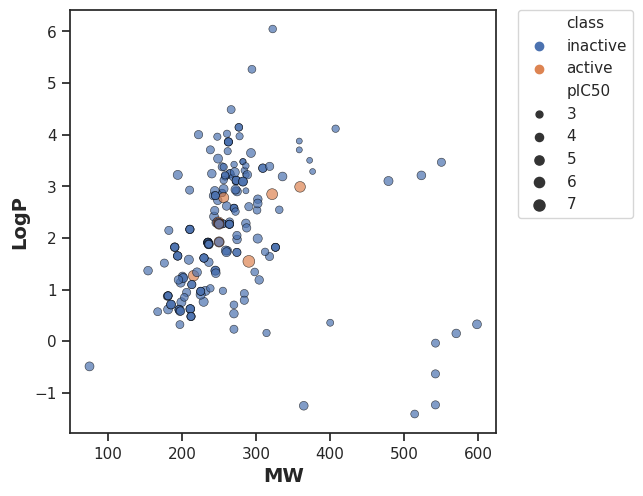

In [67]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

### **Box plots**

#### **pIC50 value**

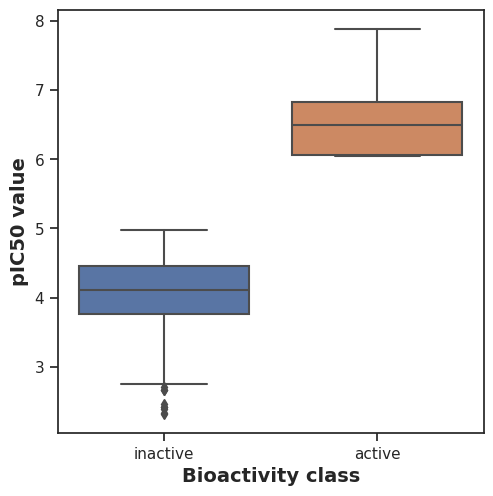

In [68]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'pIC50', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [69]:
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'class']
  df = df_2class[selection]
  active = df[df['class'] == 'active']
  active = active[descriptor]

  selection = [descriptor, 'class']
  df = df_2class[selection]
  inactive = df[df['class'] == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'
  
  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [70]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,1560.0,0.000002,0.05,Different distribution (reject H0)


#### **MW**

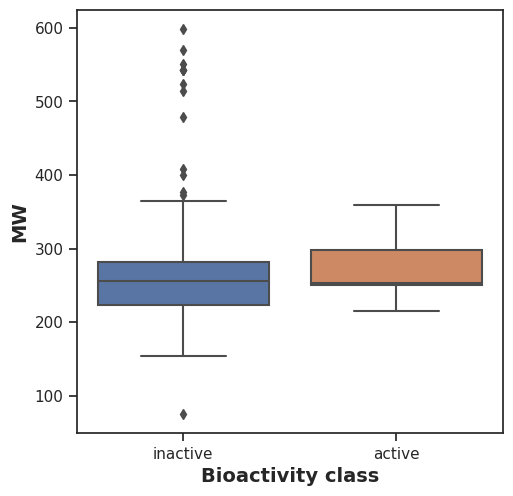

In [71]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'MW', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')

In [72]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,915.0,0.408837,0.05,Same distribution (fail to reject H0)


#### **LogP**

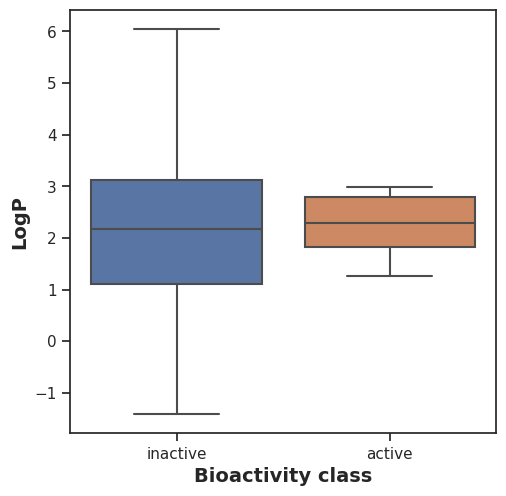

In [73]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'LogP', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [74]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,823.0,0.794104,0.05,Same distribution (fail to reject H0)


#### **NumHDonors**

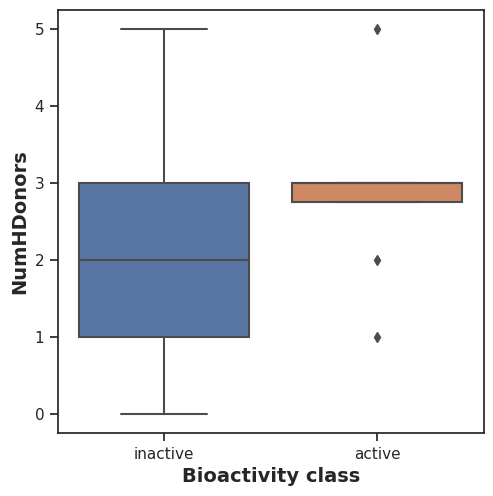

In [75]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHDonors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [76]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,1141.5,0.021358,0.05,Different distribution (reject H0)


#### **NumHAcceptors**

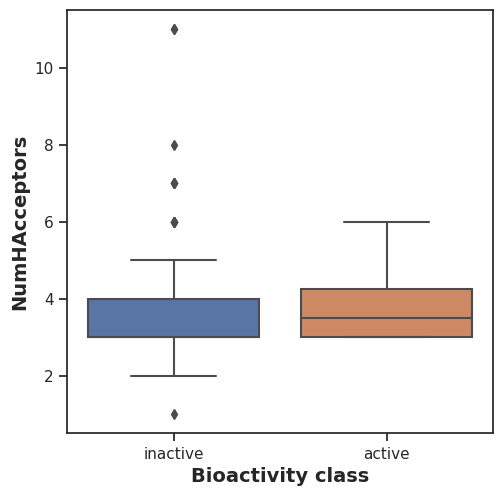

In [77]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHAcceptors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')

In [78]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,876.5,0.525213,0.05,Same distribution (fail to reject H0)


#### **Interpretation of Statistical Results**

##### **Box Plots**

###### **pIC50 values**

Taking a look at pIC50 values, the **actives** and **inactives** displayed ***statistically significant difference***, which is to be expected since threshold values (``IC50 < 1,000 nM = Actives while IC50 > 10,000 nM = Inactives``, corresponding to ``pIC50 > 6 = Actives and pIC50 < 5 = Inactives``) were used to define actives and inactives.

###### **Lipinski's descriptors**

All of the 4 Lipinski's descriptors exhibited ***statistically significant difference*** between the **actives** and **inactives**.

## **Zip files**

In [79]:
! zip -r results.zip . -i *.csv *.pdf

  adding: plot_NumHAcceptors.pdf (deflated 37%)
  adding: bioactivity_data_3class_pIC50.csv (deflated 72%)
  adding: plot_NumHDonors.pdf (deflated 38%)
  adding: mannwhitneyu_pIC50.csv (deflated 10%)
  adding: plot_LogP.pdf (deflated 37%)
  adding: plot_MW_vs_LogP.pdf (deflated 10%)
  adding: mannwhitneyu_LogP.csv (deflated 7%)
  adding: mannwhitneyu_MW.csv (deflated 8%)
  adding: mannwhitneyu_NumHAcceptors.csv (deflated 11%)
  adding: plot_bioactivity_class.pdf (deflated 39%)
  adding: plot_MW.pdf (deflated 38%)
  adding: bioactivity_data_2class_pIC50.csv (deflated 72%)
  adding: mannwhitneyu_NumHDonors.csv (deflated 10%)
  adding: bioactivity_data_curated.csv (deflated 79%)
  adding: plot_ic50.pdf (deflated 36%)
